In [3]:
import pandas as pd, numpy as np
import matplotlib.pyplot as plt
import seaborn as sns, scipy
import warnings
warnings.filterwarnings("ignore")

In [4]:
calender =pd.read_excel(r"C:\Users\Raju\Downloads\Budget Sales data\Budget Sales data\AdventureWorks_Database.xlsx", sheet_name = 'Calender')
customer = pd.read_excel(r"C:\Users\Raju\Downloads\Budget Sales data\Budget Sales data\AdventureWorks_Database.xlsx", sheet_name = 'Customers')
product = pd.read_excel(r"C:\Users\Raju\Downloads\Budget Sales data\Budget Sales data\AdventureWorks_Database.xlsx", sheet_name = 'Product')
teritory =  pd.read_excel(r"C:\Users\Raju\Downloads\Budget Sales data\Budget Sales data\AdventureWorks_Database.xlsx", sheet_name = 'Territory')
sales =  pd.read_excel(r"C:\Users\Raju\Downloads\Budget Sales data\Budget Sales data\AdventureWorks_Database.xlsx", sheet_name = 'Sales')

In [5]:
s_c = pd.merge(sales,customer,on = 'CustomerKey')

In [6]:
s_c_p = pd.merge(s_c,product, on = 'ProductKey')

In [7]:
s_c_p_t = pd.merge(s_c_p,teritory, on = 'SalesTerritoryKey')

In [8]:
s_c_p_t_c = pd.merge(s_c_p_t, calender, left_on = 'OrderDate', right_on ='Date')

In [9]:
df = s_c_p_t_c.copy()

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58189 entries, 0 to 58188
Data columns (total 73 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   ProductKey            58189 non-null  int64         
 1   OrderDate             58189 non-null  datetime64[ns]
 2   ShipDate              58189 non-null  datetime64[ns]
 3   CustomerKey           58189 non-null  int64         
 4   PromotionKey          58189 non-null  int64         
 5   SalesTerritoryKey     58189 non-null  int64         
 6   SalesOrderNumber      58189 non-null  object        
 7   SalesOrderLineNumber  58189 non-null  int64         
 8   OrderQuantity         58189 non-null  int64         
 9   UnitPrice             58189 non-null  float64       
 10  TotalProductCost      58189 non-null  float64       
 11  SalesAmount           58189 non-null  float64       
 12  TaxAmt                58189 non-null  float64       
 13  Unnamed: 13     

In [11]:
df.describe().T

,count,mean,min,25%,50%,75%,max,std
ProductKey,58189.0,437.208304,214.0,358.0,479.0,529.0,606.0,118.099746
OrderDate,58189,2016-06-03 03:56:09.605939200,2014-01-01 00:00:00,2016-04-01 00:00:00,2016-07-07 00:00:00,2016-10-10 00:00:00,2016-12-30 00:00:00,NaN
ShipDate,58189,2016-06-10 04:03:24.657237760,2014-01-08 00:00:00,2016-04-08 00:00:00,2016-07-14 00:00:00,2016-10-17 00:00:00,2017-01-07 00:00:00,NaN
CustomerKey,58189.0,18853.00464,11000.0,14012.0,18151.0,23450.0,29483.0,5433.374315
PromotionKey,58189.0,1.043427,1.0,1.0,1.0,1.0,14.0,0.348948
SalesTerritoryKey,58189.0,6.261716,1.0,4.0,7.0,9.0,10.0,2.960248
SalesOrderLineNumber,58189.0,1.887453,1.0,1.0,2.0,2.0,8.0,1.018829
OrderQuantity,58189.0,1.569386,1.0,1.0,1.0,2.0,4.0,1.047532
UnitPrice,58189.0,413.888218,0.5725,4.99,24.49,269.995,3578.27,833.052938
TotalProductCost,58189.0,296.539185,0.8565,3.3623,12.1924,343.6496,2171.2942,560.171436


In [12]:
df.isna().sum()

ProductKey        0
OrderDate         0
ShipDate          0
CustomerKey       0
PromotionKey      0
                 ..
MonthYearLong     0
MonthYearNum      0
WeekdayNum        0
Weekday           0
WeekdayWeekend    0
Length: 73, dtype: int64

In [13]:
df.columns

Index(['ProductKey', 'OrderDate', 'ShipDate', 'CustomerKey', 'PromotionKey',
       'SalesTerritoryKey', 'SalesOrderNumber', 'SalesOrderLineNumber',
       'OrderQuantity', 'UnitPrice', 'TotalProductCost', 'SalesAmount',
       'TaxAmt', 'Unnamed: 13', 'Unnamed: 14', 'Unnamed: 15', 'Unnamed: 16',
       'Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19', 'StandardCost_x',
       'List Price', 'Unnamed: 22', 'diif std cost', 'diff list price',
       'FirstName', 'LastName', 'FullName', 'BirthDate', 'MaritalStatus',
       'Gender', 'YearlyIncome', 'TotalChildren', 'NumberChildrenAtHome',
       'Education', 'Occupation', 'HouseOwnerFlag', 'NumberCarsOwned',
       'AddressLine1', 'DateFirstPurchase', 'CommuteDistance', 'ProductName',
       'SubCategory', 'Category', 'StandardCost_y', 'Color', 'ListPrice',
       'DaysToManufacture', 'ProductLine', 'ModelName', 'Photo',
       'ProductDescription', 'StartDate', 'Region', 'Country', 'Group',
       'RegionImage', 'Date', 'DateKey', 'Year', 'Qu

In [14]:
null_counts = df.isnull().sum()
columns_with_nulls = null_counts[null_counts > 0]
print(columns_with_nulls)

Unnamed: 13    58189
Unnamed: 14    58189
Unnamed: 17    58189
Unnamed: 19    58189
Unnamed: 22    58189
Color          27442
dtype: int64


In [15]:
df.shape

(58189, 73)

In [16]:
bs = df.copy()

In [17]:
bs.drop(['Unnamed: 13', 'Unnamed: 14', 'Unnamed: 17', 'Unnamed: 19', 'Unnamed: 22'], axis = 1, inplace = True)

In [18]:
null_counts =  bs.isnull().sum()
columns_with_nulls = null_counts[null_counts > 0]
print(columns_with_nulls)

Color    27442
dtype: int64


In [19]:
bs.shape

(58189, 68)

In [20]:
bs.dropna(subset=['Color'], inplace = True)

In [21]:
null_counts =  bs.isnull().sum()
columns_with_nulls = null_counts[null_counts > 0]
print(columns_with_nulls)

Series([], dtype: int64)


In [22]:
bs.shape

(30747, 68)

In [23]:
bs.isna().sum()

ProductKey        0
OrderDate         0
ShipDate          0
CustomerKey       0
PromotionKey      0
                 ..
MonthYearLong     0
MonthYearNum      0
WeekdayNum        0
Weekday           0
WeekdayWeekend    0
Length: 68, dtype: int64

In [24]:
bs.columns

Index(['ProductKey', 'OrderDate', 'ShipDate', 'CustomerKey', 'PromotionKey',
       'SalesTerritoryKey', 'SalesOrderNumber', 'SalesOrderLineNumber',
       'OrderQuantity', 'UnitPrice', 'TotalProductCost', 'SalesAmount',
       'TaxAmt', 'Unnamed: 15', 'Unnamed: 16', 'Unnamed: 18', 'StandardCost_x',
       'List Price', 'diif std cost', 'diff list price', 'FirstName',
       'LastName', 'FullName', 'BirthDate', 'MaritalStatus', 'Gender',
       'YearlyIncome', 'TotalChildren', 'NumberChildrenAtHome', 'Education',
       'Occupation', 'HouseOwnerFlag', 'NumberCarsOwned', 'AddressLine1',
       'DateFirstPurchase', 'CommuteDistance', 'ProductName', 'SubCategory',
       'Category', 'StandardCost_y', 'Color', 'ListPrice', 'DaysToManufacture',
       'ProductLine', 'ModelName', 'Photo', 'ProductDescription', 'StartDate',
       'Region', 'Country', 'Group', 'RegionImage', 'Date', 'DateKey', 'Year',
       'Quarter', 'MonthNum', 'Month', 'FiscalYear', 'FiscalQuarter',
       'FiscalMonthNum

### Sales Analysis:

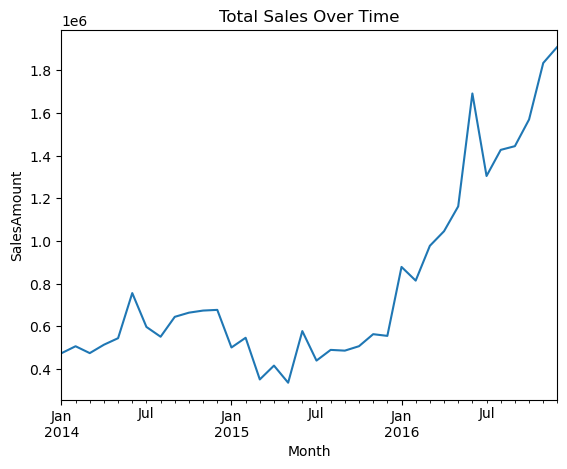

In [26]:
bs['OrderDate'] = pd.to_datetime(df['OrderDate'])
sales_over_time = bs.groupby(df['OrderDate'].dt.to_period('M'))['SalesAmount'].sum()
sales_over_time.plot(kind='line', title='Total Sales Over Time', xlabel='Month', ylabel='SalesAmount')
plt.show()


### Product Profitability

In [28]:
bs['ProfitMargin'] = (bs['SalesAmount'] - bs['TotalProductCost']) / bs['SalesAmount'] * 100
profit_by_category = bs.groupby('Category')['ProfitMargin'].mean()
print(profit_by_category)


Category
Accessories    62.599890
Bikes          40.246008
Clothing       38.497182
Name: ProfitMargin, dtype: float64


### Customer Segmentation by Income and Gender


In [30]:
income_by_gender = bs.groupby('Gender')['YearlyIncome'].mean()
print(income_by_gender)
income_bins = [0, 30000, 60000, 90000, 120000, df['YearlyIncome'].max()]
income_labels = ['Low', 'Mid-Low', 'Mid', 'Mid-High', 'High']

bs['IncomeSegment'] = pd.cut(df['YearlyIncome'], bins=income_bins, labels=income_labels)
customer_segments = bs['IncomeSegment'].value_counts()
print(customer_segments)


Gender
F    60264.337209
M    59844.299674
Name: YearlyIncome, dtype: float64
IncomeSegment
Mid-Low     10580
Mid          8212
Low          7792
Mid-High     2497
High         1666
Name: count, dtype: int64


###  Sales by Product Category

Category
Bikes          2.831814e+07
Clothing       3.226766e+05
Accessories    2.547462e+05
Name: SalesAmount, dtype: float64


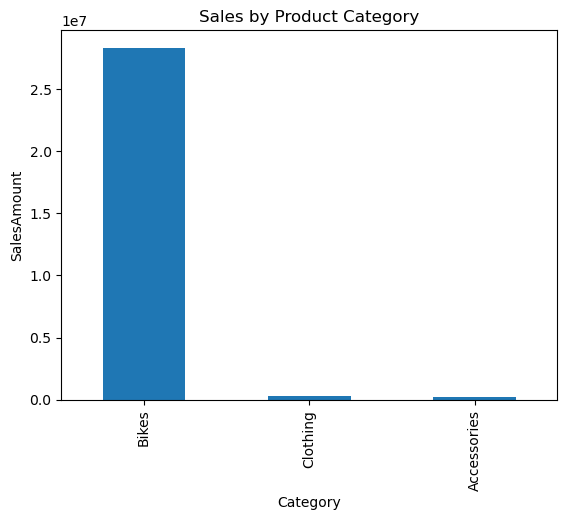

In [32]:
sales_by_category = bs.groupby('Category')['SalesAmount'].sum().sort_values(ascending=False)
print(sales_by_category)
sales_by_category.plot(kind='bar', title='Sales by Product Category', xlabel='Category', ylabel='SalesAmount')
plt.show()


### Order Processing Time Analysis


In [34]:
bs['ProcessingTime'] = (pd.to_datetime(bs['ShipDate']) - pd.to_datetime(bs['OrderDate'])).dt.days

avg_processing_time = bs['ProcessingTime'].mean()
print(f'Average Order Processing Time: {avg_processing_time} days')

processing_time_by_category = bs.groupby('Category')['ProcessingTime'].mean()
print(processing_time_by_category)


Average Order Processing Time: 7.008326015546232 days
Category
Accessories    6.997964
Bikes          7.011838
Clothing       7.010387
Name: ProcessingTime, dtype: float64


### Sales by Region and Country

Region          Country       
Australia       Australia         8.972656e+06
Canada          Canada            1.902906e+06
Central         United States     2.838350e+03
France          France            2.604810e+06
Germany         Germany           2.856033e+06
Northeast       United States     6.345998e+03
Northwest       United States     3.572581e+06
Southeast       United States     1.177686e+04
Southwest       United States     5.620509e+06
United Kingdom  United Kingdom    3.345110e+06
Name: SalesAmount, dtype: float64


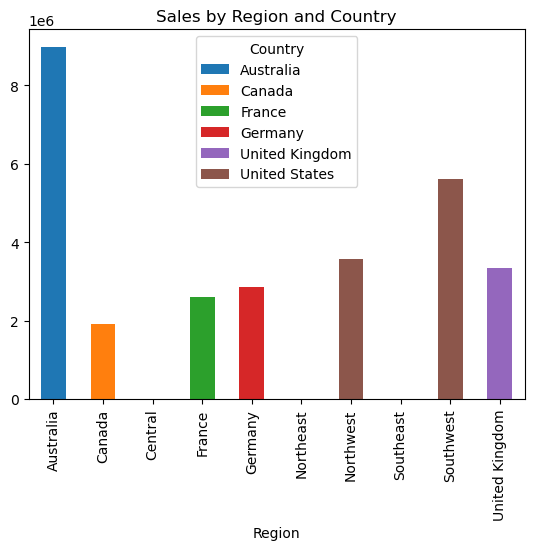

In [36]:
sales_by_region = bs.groupby(['Region', 'Country'])['SalesAmount'].sum()
print(sales_by_region)

sales_by_region.unstack().plot(kind='bar', stacked=True, title='Sales by Region and Country')
plt.show()


### Cross-Selling Opportunities

In [38]:
cross_selling = bs.groupby('SalesOrderNumber')['ProductName'].apply(lambda x: ', '.join(x))
print(cross_selling.head())

SalesOrderNumber
SO43697           Road-150 Red, 62
SO43698    Mountain-100 Silver, 44
SO43699    Mountain-100 Silver, 44
SO43700         Road-650 Black, 62
SO43701    Mountain-100 Silver, 44
Name: ProductName, dtype: object


###  Calculate Yearly Sales Growth

In [40]:
bs['Year'] = pd.to_datetime(bs['OrderDate']).dt.year
yearly_sales = bs.groupby('Year')['SalesAmount'].sum()

yearly_sales_growth = yearly_sales.pct_change() * 100  # percentage change
print(yearly_sales_growth)


Year
2014           NaN
2015    -18.522827
2016    178.739580
Name: SalesAmount, dtype: float64


In [41]:
customer_lifetime_value = bs.groupby('CustomerKey')['SalesAmount'].sum().sort_values(ascending=False)

print(customer_lifetime_value.head(10))


CustomerKey
12301    13254.2100
12131    13229.7200
12308    13212.7000
12132    13209.7200
12300    13199.7300
12321    13172.7100
12124    13163.7200
12307    13144.2300
12296    13128.7300
11433    12893.3982
Name: SalesAmount, dtype: float64


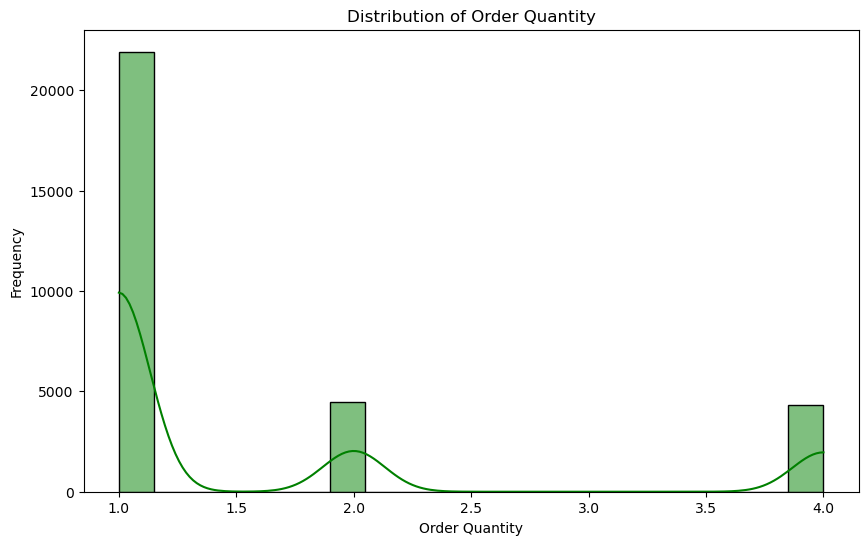

In [42]:
# Plot histogram of order quantity
plt.figure(figsize=(10, 6))
sns.histplot(bs['OrderQuantity'], bins=20, kde=True, color='g')
plt.title('Distribution of Order Quantity')
plt.xlabel('Order Quantity')
plt.ylabel('Frequency')
plt.show()


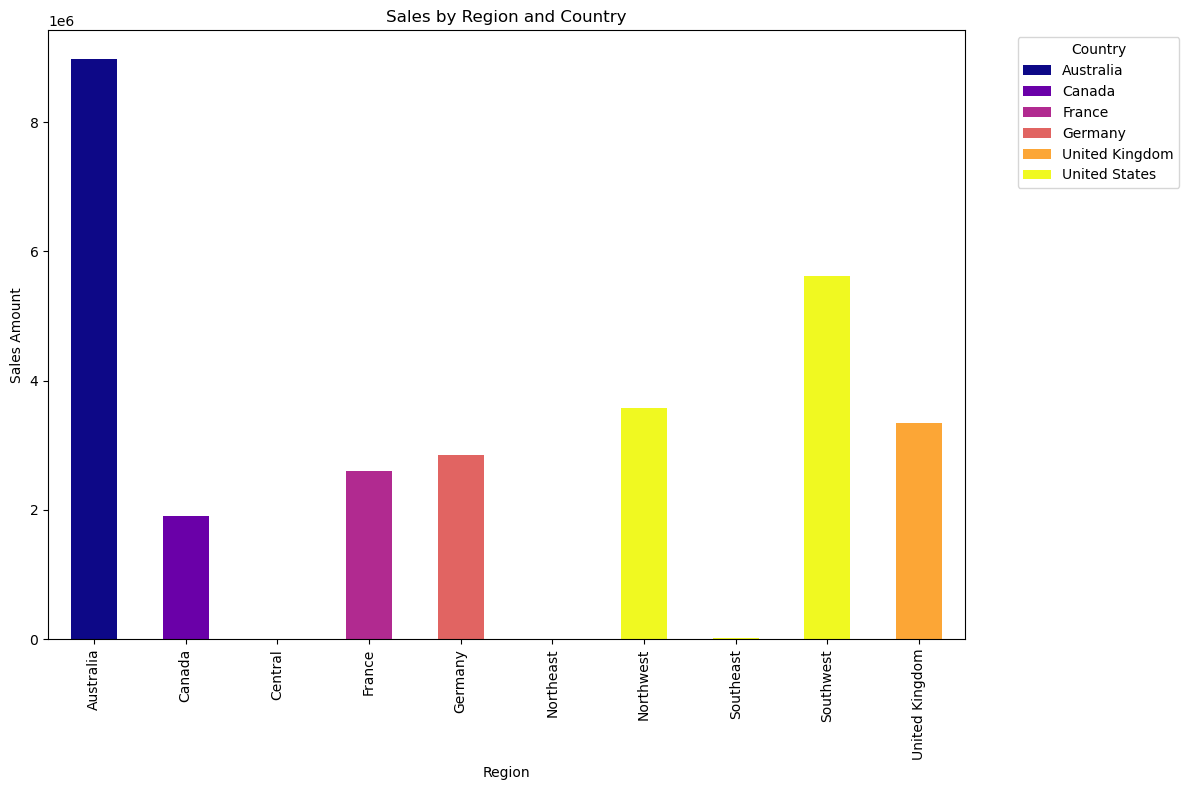

In [43]:
# Group by Region and Country
sales_by_region = bs.groupby(['Region', 'Country'])['SalesAmount'].sum().unstack()

# Plot sales by region and country
sales_by_region.plot(kind='bar', stacked=True, figsize=(12, 8), colormap='plasma')
plt.title('Sales by Region and Country')
plt.xlabel('Region')
plt.ylabel('Sales Amount')
plt.legend(title='Country', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


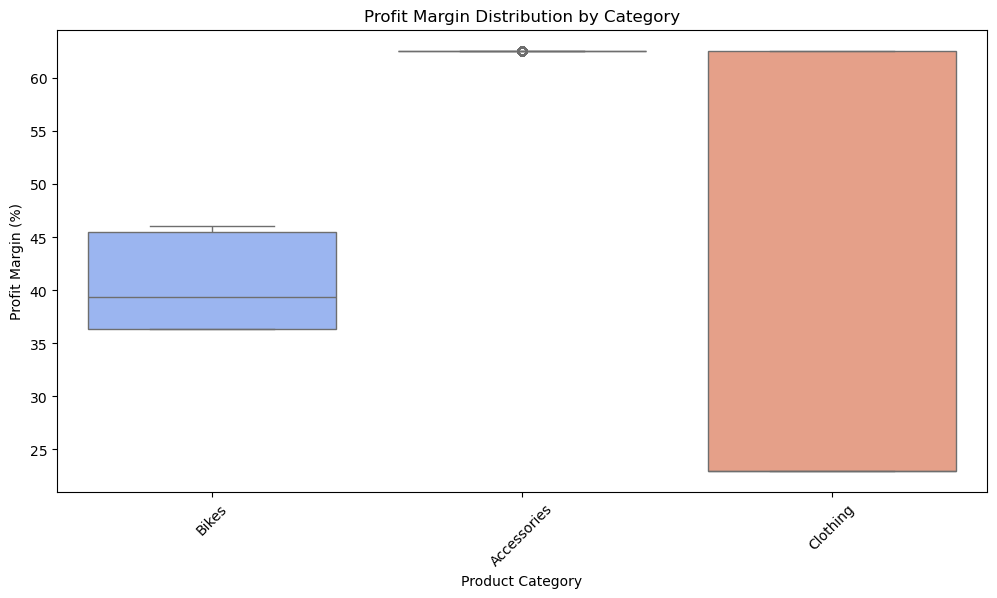

In [44]:
# Calculate profit margin for each product
bs['ProfitMargin'] = (bs['SalesAmount'] - bs['TotalProductCost']) / bs['SalesAmount'] * 100

# Plot profit margin distribution by category
plt.figure(figsize=(12, 6))
sns.boxplot(x='Category', y='ProfitMargin', data=bs, palette='coolwarm')
plt.title('Profit Margin Distribution by Category')
plt.xlabel('Product Category')
plt.ylabel('Profit Margin (%)')
plt.xticks(rotation=45)
plt.show()


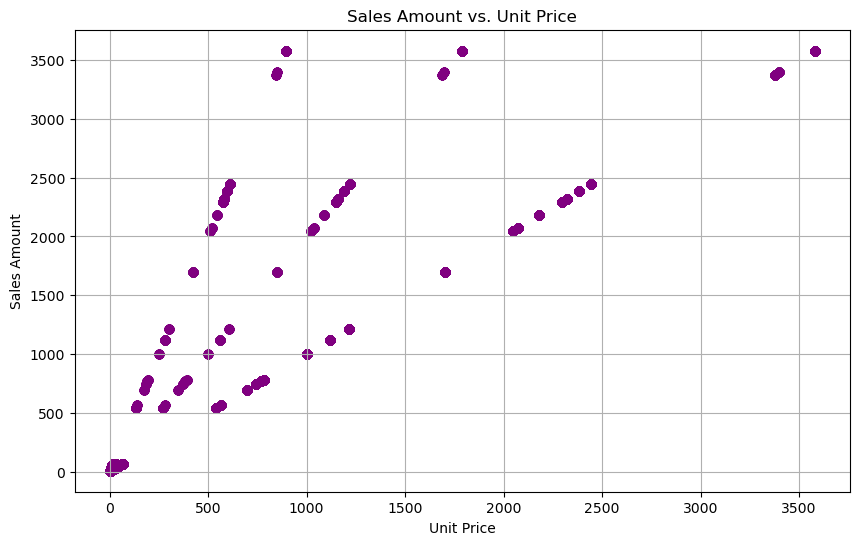

In [45]:
# Scatter plot to visualize relationship between Unit Price and Sales Amount
plt.figure(figsize=(10, 6))
plt.scatter(bs['UnitPrice'], bs['SalesAmount'], color='purple', alpha=0.6)
plt.title('Sales Amount vs. Unit Price')
plt.xlabel('Unit Price')
plt.ylabel('Sales Amount')
plt.grid(True)
plt.show()


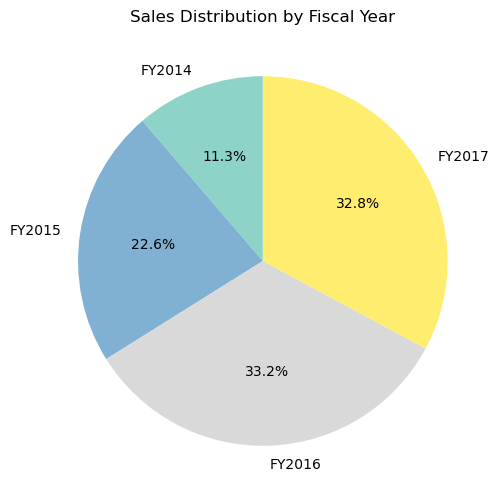

In [88]:
# Group by Fiscal Year and calculate total sales
sales_by_fiscal_year = bs.groupby('FiscalYear')['SalesAmount'].sum()

# Plot a pie chart
plt.figure(figsize=(8, 6))
sales_by_fiscal_year.plot(kind='pie', autopct='%1.1f%%', startangle=90, cmap='Set3')
plt.title('Sales Distribution by Fiscal Year')
plt.ylabel('')  # Hides y-label to make it cleaner
plt.show()


In [47]:
bs


,ProductKey,OrderDate,ShipDate,CustomerKey,PromotionKey,SalesTerritoryKey,SalesOrderNumber,SalesOrderLineNumber,OrderQuantity,UnitPrice,...,FiscalMonth,MonthYear,MonthYearLong,MonthYearNum,WeekdayNum,Weekday,WeekdayWeekend,ProfitMargin,IncomeSegment,ProcessingTime
0,310,2014-01-01,2014-01-08,21768,1,6,SO43697,1,2,1789.1350,...,Jan,Jan-14,Jan-2014,201401,4,Wed,Weekday,39.320001,Mid,7
1,346,2014-01-01,2014-01-08,28389,1,7,SO43698,1,2,1699.9950,...,Jan,Jan-14,Jan-2014,201401,4,Wed,Weekday,43.759999,Low,7
2,346,2014-01-01,2014-01-08,25863,1,1,SO43699,1,2,1699.9950,...,Jan,Jan-14,Jan-2014,201401,4,Wed,Weekday,43.759999,Mid-Low,7
3,336,2014-01-01,2014-01-08,14501,1,4,SO43700,1,2,349.5491,...,Jan,Jan-14,Jan-2014,201401,4,Wed,Weekday,40.902966,Mid,7
4,346,2014-01-01,2014-01-08,11003,1,9,SO43701,1,2,1699.9950,...,Jan,Jan-14,Jan-2014,201401,4,Wed,Weekday,43.759999,Mid,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58183,222,2016-12-30,2017-01-07,12314,1,8,SO74144,2,1,34.9900,...,Dec,Dec-16,Dec-2016,201612,6,Fri,Weekday,62.599886,Mid-High,8
58184,561,2016-12-30,2017-01-07,13650,1,9,SO74145,1,1,2384.0700,...,Dec,Dec-16,Dec-2016,201612,6,Fri,Weekday,37.840001,Mid-High,8
58185,584,2016-12-30,2017-01-07,26916,1,9,SO74146,1,1,539.9900,...,Dec,Dec-16,Dec-2016,201612,6,Fri,Weekday,36.360007,Low,8
58186,605,2016-12-30,2017-01-07,27473,1,9,SO74147,1,1,539.9900,...,Dec,Dec-16,Dec-2016,201612,6,Fri,Weekday,36.360007,Low,8
